# World Bank

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly

In [11]:
import wbgapi as wb

## Aims
Retrieve data from primary source using an API.
Learn usage of "wbgapi" library provided by World Bank.
Focus on "World Development Indicators" and demographic features.
Visualise with a variety of plotting libraries, including Plotly.

## Data
This API can access over 17,000 indicators from over 60 World Bank databases
Each indicator is identified by acronyms separated by dots, for example SP.POP.TOTL

In [31]:
wb.source.info() # "World Development Indicators" source database id 2

id    name                                                                  code      concepts  lastupdated
----  --------------------------------------------------------------------  ------  ----------  -------------
1     Doing Business                                                        DBS              3  2021-08-18
2     World Development Indicators                                          WDI              3  2023-09-19
3     Worldwide Governance Indicators                                       WGI              3  2023-09-29
5     Subnational Malnutrition Database                                     SNM              3  2016-03-21
6     International Debt Statistics                                         IDS              4  2022-12-06
11    Africa Development Indicators                                         ADI              3  2013-02-22
12    Education Statistics                                                  EDS              3  2023-10-12
13    Enterprise Surveys                                                    ESY              3  2022-03-25
14    Gender Statistics                                                     GDS              3  2023-07-24
15    Global Economic Monitor                                               GEM              3  2023-07-21
16    Health Nutrition and Population Statistics                            HNP              3  2023-09-21
18    IDA Results Measurement System                                        IDA              3  2021-07-23
19    Millennium Development Goals                                          MDG              3  2018-09-19
20    Quarterly Public Sector Debt                                          PSD              3  2023-10-25
22    Quarterly External Debt Statistics SDDS                               QDS              3  2023-10-17
23    Quarterly External Debt Statistics GDDS                               QDG              3  2023-10-17
25    Jobs                                                                  JOB              3  2022-06-29
27    Global Economic Prospects                                             GEP              3  2023-06-06
28    Global Financial Inclusion                                            FDX              3  2023-04-12
29    The Atlas of Social Protection: Indicators of Resilience and Equity   GSP              3  2023-05-23
30    Exporter Dynamics Database – Indicators at Country-Year Level         ED1              3  2016-03-31
31    Country Policy and Institutional Assessment                           CPI              3  2023-07-24
32    Global Financial Development                                          GFD              3  2022-09-23
33    G20 Financial Inclusion Indicators                                    G2F              3  2019-02-27
34    Global Partnership for Education                                      GPE              3  2013-04-12
35    Sustainable Energy for All                                            SE4              3  2018-06-30
37    LAC Equity Lab                                                        LEL              3  2016-04-06
38    Subnational Poverty                                                   SNP              3  2015-04-27
39    Health Nutrition and Population Statistics by Wealth Quintile         HNQ              3  2022-12-13
40    Population estimates and projections                                  HPP              3  2023-07-05
41    Country Partnership Strategy for India (FY2013 - 17)                  CPS              3  2015-05-22
43    Adjusted Net Savings                                                  WAT              3  2023-06-08
45    Indonesia Database for Policy and Economic Research                   IDD              3  2022-08-11
46    Sustainable Development Goals                                         SDG              3  2022-07-22
50    Subnational Population                                                SNT              3  2017-09-21
54    Joint External Debt Hub        

In [ ]:
wb.series.info(db=2) # features in "World Development Indicators" database

In [8]:
wba.economy.info() # list country ISO 3-letter codes, and names
# includes supranational regions which is why it is labelled "economy" rather than "country"

id    value                                                 region    incomeLevel
----  ----------------------------------------------------  --------  -------------
ABW   Aruba                                                 LCN       HIC
AFE   Africa Eastern and Southern
AFG   Afghanistan                                           SAS       LIC
AFW   Africa Western and Central
AGO   Angola                                                SSF       LMC
ALB   Albania                                               ECS       UMC
AND   Andorra                                               ECS       HIC
ARB   Arab World
ARE   United Arab Emirates                                  MEA       HIC
ARG   Argentina                                             LCN       UMC
ARM   Armenia                                               ECS       UMC
ASM   American Samoa                                        EAS       HIC
ATG   Antigua and Barbuda                                   LCN       HIC
AUS   Australia                                             EAS       HIC
AUT   Austria                                               ECS       HIC
AZE   Azerbaijan                                            ECS       UMC
BDI   Burundi                                               SSF       LIC
BEL   Belgium                                               ECS       HIC
BEN   Benin                                                 SSF       LMC
BFA   Burkina Faso                                          SSF       LIC
BGD   Bangladesh                                            SAS       LMC
BGR   Bulgaria                                              ECS       UMC
BHR   Bahrain                                               MEA       HIC
BHS   Bahamas, The                                          LCN       HIC
BIH   Bosnia and Herzegovina                                ECS       UMC
BLR   Belarus                                               ECS       UMC
BLZ   Belize                                                LCN       UMC
BMU   Bermuda                                               NAC       HIC
BOL   Bolivia                                               LCN       LMC
BRA   Brazil                                                LCN       UMC
BRB   Barbados                                              LCN       HIC
BRN   Brunei Darussalam                                     EAS       HIC
BTN   Bhutan                                                SAS       LMC
BWA   Botswana                                              SSF       UMC
CAF   Central African Republic                              SSF       LIC
CAN   Canada                                                NAC       HIC
CEB   Central Europe and the Baltics
CHE   Switzerland                                           ECS       HIC
CHI   Channel Islands                                       ECS       HIC
CHL   Chile                                                 LCN       HIC
CHN   China                                                 EAS       UMC
CIV   Cote d'Ivoire                                         SSF       LMC
CMR   Cameroon                                              SSF       LMC
COD   Congo, Dem. Rep.                                      SSF       LIC
COG   Congo, Rep.                                           SSF       LMC
COL   Colombia                                              LCN       UMC
COM   Comoros                                               SSF       LMC
CPV   Cabo Verde                                            SSF       LMC
CRI   Costa Rica                                            LCN       UMC
CSS   Caribbean small states
CUB   Cuba                                                  LCN       UMC
CUW   Curacao                                               LCN       HIC
CYM   Cayman Islands                                        LCN       HIC
CYP   Cyprus                                                ECS       HIC
CZE   Czechia                                             

In [45]:
# need a list of countries to match and only include these
import pycountry as cy
list(cy.countries)[:5]  # pycountry.ExistingCountries

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248')]

In [19]:
countries = list(cy.countries)
country_codes = [country.alpha_3 for country in countries]
print(country_codes)
print(len(country_codes))

['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BVT', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX'

In [10]:
wba.series.info(q="fertility")

id              value
--------------  -------------------------------------------------------------
SP.ADO.TFRT     Adolescent fertility rate (births per 1,000 women ages 15-19)
SP.DYN.TFRT.IN  Fertility rate, total (births per woman)
SP.DYN.WFRT     Wanted fertility rate (births per woman)
                3 elements

In [14]:
tfr = wb.data.DataFrame('SP.DYN.TFRT.IN', mrnev=1, columns='time', numericTimeKeys=True)
len(tfr)

261

In [58]:
df = wb.data.DataFrame('SP.POP.TOTL', time=2022)
print(df.head())
print(len(df))

         SP.POP.TOTL
economy             
ABW         106445.0
AFE      720839314.0
AFG       41128771.0
AFW      490330870.0
AGO       35588987.0
266


AttributeError: 'DataFrame' object has no attribute 'economy'

In [63]:
df = wb.data.DataFrame('SP.POP.TOTL', time=2022)
df = df.reset_index()
wb_countries = list(df.economy)
%pprint
print(wb_countries)
%pprint

Pretty printing has been turned OFF
['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE

In [56]:
# Aim: remove all supra-national regions

# only include rows matching the list of country-codes
df = wb.data.DataFrame('SP.POP.TOTL', country_codes, time=2022)

# make a country column from index
df = df.reset_index()
df.rename(columns={"economy": "country"})

print(len(df))
# Why not 249 matching? 
# Some not recognised by World Bank as a "country" e.g. Taiwan

print(df.head(5))
pop_2022 = df

215
  economy  SP.POP.TOTL
0     ABW     106445.0
1     AFG   41128771.0
2     AGO   35588987.0
3     ALB    2775634.0
4     AND      79824.0


In [51]:
# show non-country rows to check filter worked correctly

TypeError: 'Index' object is not callable

In [46]:
notCountry = wb.data.DataFrame('SP.POP.TOTL', !country_codes, time=2022)
notCountry

SyntaxError: invalid syntax (723107008.py, line 1)

In [33]:
pop_10 = pop_2022.sort_values("SP.POP.TOTL", ascending=False)[:10]
pop_10iso BGD


SP.POP.TOTL
economy              
IND      1.417173e+09
CHN      1.412175e+09
USA      3.332876e+08
IDN      2.755013e+08
PAK      2.358249e+08
NGA      2.185412e+08
BRA      2.153135e+08
BGD      1.711864e+08
RUS      1.435557e+08
MEX      1.275041e+08

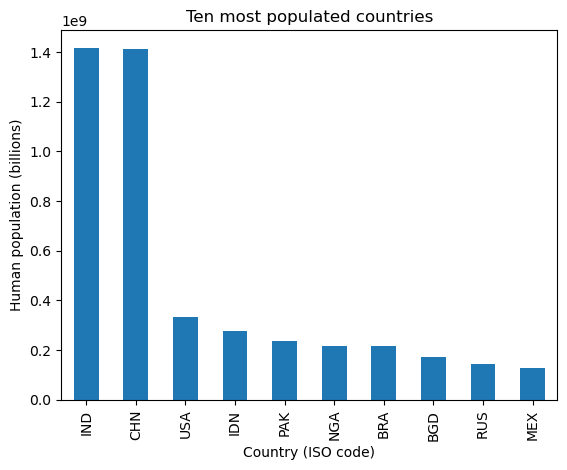

In [42]:
pop_10.plot.bar()
plt.title("Ten most populated countries")
plt.xlabel("Country (ISO code)")
plt.ylabel("Human population (billions)")
plt.legend("", frameon=False)
plt.show()

In [5]:
for row in wb.data.fetch('SP.POP.TOTL', 'GBR', time=range(1960, 2023, 5)):
    print(row)

{'value': 67081234, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR2020'}
{'value': 65116219, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR2015'}
{'value': 62766365, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR2010'}
{'value': 60401206, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR2005'}
{'value': 58892514, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR2000'}
{'value': 58019030, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR1995'}
{'value': 57247586, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR1990'}
{'value': 56550268, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR1985'}
{'value': 56314216, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 'YR1980'}
{'value': 56225800, 'series': 'SP.POP.TOTL', 'economy': 'GBR', 'aggregate': False, 'time': 

In [20]:
df = wb.data.DataFrame('SP.POP.TOTL', 'GBR', time=range(1960, 2023, 5))
df

YR1960      YR1965      YR1970      YR1975      YR1980  \
economy                                                               
GBR      52400000.0  54348050.0  55663250.0  56225800.0  56314216.0   

             YR1985      YR1990      YR1995      YR2000      YR2005  \
economy                                                               
GBR      56550268.0  57247586.0  58019030.0  58892514.0  60401206.0   

             YR2010      YR2015      YR2020  
economy                                      
GBR      62766365.0  65116219.0  67081234.0

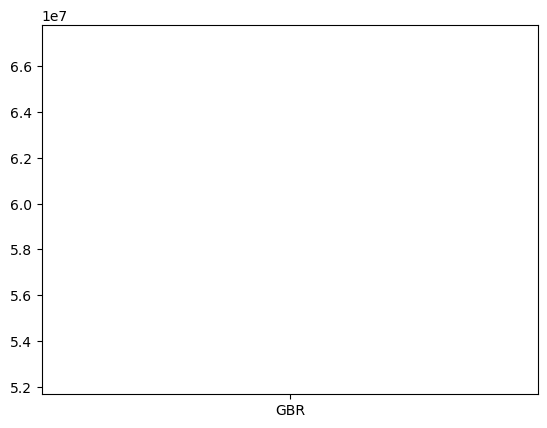

In [21]:
plt.plot(df)
plt.show()

In [11]:
gdp = wba.data.DataFrame('NY.GDP.PCAP.CD', wba.region.members('EMU'))
gdp

YR1960       YR1961       YR1962       YR1963       YR1964  \
economy                                                                    
AUT       935.460427  1031.815004  1087.834243  1167.000532  1269.412583   
BEL      1273.691659  1350.197673  1438.523233  1535.023729  1701.846276   
CYP              NaN          NaN          NaN          NaN          NaN   
DEU              NaN          NaN          NaN          NaN          NaN   
ESP       396.392253   450.053289   520.206131   609.487384   675.241639   
EST              NaN          NaN          NaN          NaN          NaN   
FIN      1179.353011  1327.427224  1411.702398  1522.319242  1707.503938   
FRA      1333.881573  1430.434624  1585.735311  1758.856659  1928.999402   
GRC       520.322744   590.780055   617.057758   695.228624   783.705881   
IRL       685.614712   739.276406   797.006288   852.135302   965.135423   
ITA       804.492623   887.336745   990.260152  1126.019337  1222.544540   
LTU              NaN          NaN          NaN          NaN          NaN   
LUX      2242.015817  2222.366366  2311.798849  2441.038555  2755.633117   
LVA              NaN          NaN          NaN          NaN          NaN   
MLT              NaN          NaN          NaN          NaN          NaN   
NLD      1068.784587  1159.392357  1240.677894  1328.036649  1541.947365   
PRT       360.499299   382.729947   407.852844   432.511730   468.781082   
SVK              NaN          NaN          NaN          NaN          NaN   
SVN              NaN          NaN          NaN          NaN          NaN   

              YR1965       YR1966       YR1967       YR1968       YR1969  ...  \
economy                                                                   ...   
AUT      1374.532140  1486.968606  1569.667183  1677.673528  1825.386126  ...   
BEL      1835.594766  1957.626080  2086.636005  2222.361511  2458.081820  ...   
CYP              NaN          NaN          NaN          NaN          NaN  ...   
DEU              NaN          NaN          NaN          NaN          NaN  ...   
ESP       774.761609   889.659872   968.306782   950.545741  1077.678700  ...   
EST              NaN          NaN          NaN          NaN          NaN  ...   
FIN      1882.086858  2010.213456  2034.189050  1907.077272  2178.035250  ...   
FRA      2060.299715  2209.000173  2363.669669  2553.975843  2767.615431  ...   
GRC       899.281239   997.430467  1068.114556  1154.438531  1324.058989  ...   
IRL      1023.773726  1074.506506  1152.004952  1124.516636  1291.349920  ...   
ITA      1304.453817  1402.442354  1533.692877  1651.939377  1813.388126  ...   
LTU              NaN          NaN          NaN          NaN          NaN  ...   
LUX      2780.092719  2900.433218  2909.660629  3175.367369  3658.900683  ...   
LVA              NaN          NaN          NaN          NaN          NaN  ...   
MLT              NaN          NaN          NaN          NaN          NaN  ...   
NLD      1708.096356  1835.801424  1991.360686  2185.248659  2642.956118  ...   
PRT       520.910659   575.007681   646.822720   719.080492   795.759371  ...   
SVK              NaN          NaN          NaN          NaN          NaN  ...   
SVN              NaN          NaN          NaN          NaN          NaN  ...   

                YR2013         YR2014         YR2015         YR2016  \
economy                                                               
AUT       50731.127254   51786.377175   44195.817595   45307.587862   
BEL       46757.951856   47764.071512   41008.296719   42012.622719   
CYP       27797.453125   27244.343750   23487.218750   24715.142578   
DEU       46298.922918   48023.869985   41103.256436   42136.120791   
ESP       29077.182056   29513.651180   25754.361029   26537.159489   
EST       19056.001923   20261.066730   17402.037613   18295.342932   
FIN       49892.223363   50327.240290   42801.908117   43814.026506   
FRA       42602.717965   43068.548724   36652.922305   37062.533572   
GRC  

              YR1960       YR1961       YR1962       YR1963       YR1964  \
economy                                                                    
LUX      2242.015817  2222.366366  2311.798849  2441.038555  2755.633117   
IRL       685.614712   739.276406   797.006288   852.135302   965.135423   
NLD      1068.784587  1159.392357  1240.677894  1328.036649  1541.947365   
AUT       935.460427  1031.815004  1087.834243  1167.000532  1269.412583   
FIN      1179.353011  1327.427224  1411.702398  1522.319242  1707.503938   

              YR1965       YR1966       YR1967       YR1968       YR1969  ...  \
economy                                                                   ...   
LUX      2780.092719  2900.433218  2909.660629  3175.367369  3658.900683  ...   
IRL      1023.773726  1074.506506  1152.004952  1124.516636  1291.349920  ...   
NLD      1708.096356  1835.801424  1991.360686  2185.248659  2642.956118  ...   
AUT      1374.532140  1486.968606  1569.667183  1677.673528  1

<Axes: >

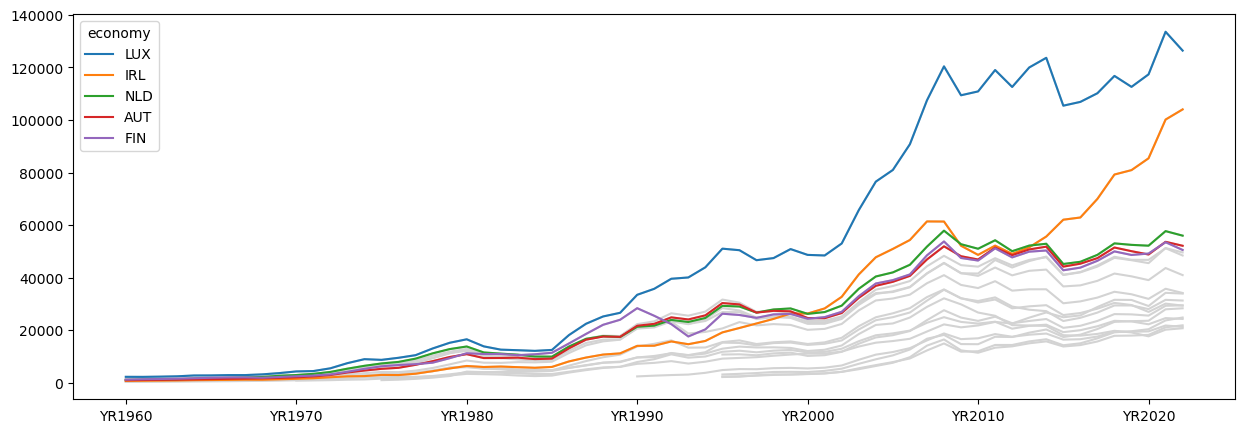

In [12]:
g5 = gdp.sort_values(by=['YR2022'],ascending=False)[:5]
print(g5)
ax=gdp.T.plot(color='lightgray', legend=False)
g5.T.plot(ax=ax, figsize=(15,5))

In [13]:
wba.series.info(q='renewable electricity output')

id              value
--------------  ------------------------------------------------------------
EG.ELC.RNEW.ZS  Renewable electricity output (% of total electricity output)
                1 elements

            YR2000     YR2005     YR2010     YR2015
economy                                            
DEU       6.198531  10.150211  16.727074  29.231770
ESP      15.613726  14.601392  32.775543  34.949891
FRA      12.967876   9.860647  13.857359  15.857667
GBR       2.663105   4.283482   6.812813  24.840050
USA       8.205997   8.578466  10.120355  13.228593


<Axes: xlabel='economy'>

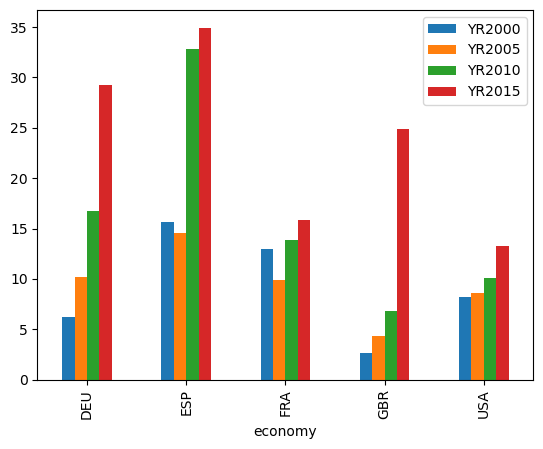

In [14]:
renewable_5 = wba.data.DataFrame('EG.ELC.RNEW.ZS',
                      ['DEU','FRA','ESP','GBR','USA'],
                      time=range(2000,2016,5))
print(renewable_5)
renewable_5.plot.bar()

<Axes: >

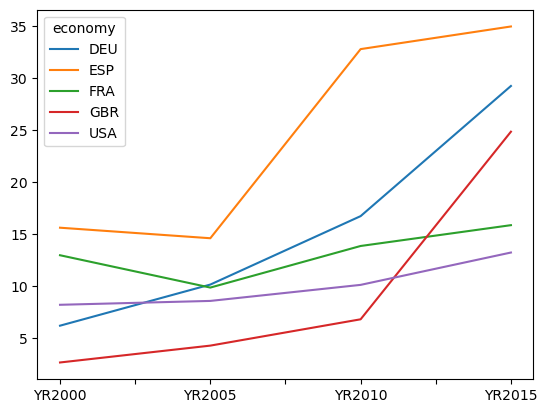

In [15]:
wba.data.DataFrame('EG.ELC.RNEW.ZS',
       ['DEU','FRA','ESP','GBR','USA'],
       time=range(2000,2016,5)).T.plot()

In [16]:
usa = wba.data.DataFrame('SP.POP.TOTL', 'USA')
print(usa.shape)

(1, 63)


In [17]:
usa = wba.data.DataFrame('SP.POP.TOTL', 'USA').transpose()
usa.shape

(63, 1)

<Axes: title={'center': 'Population USA'}>

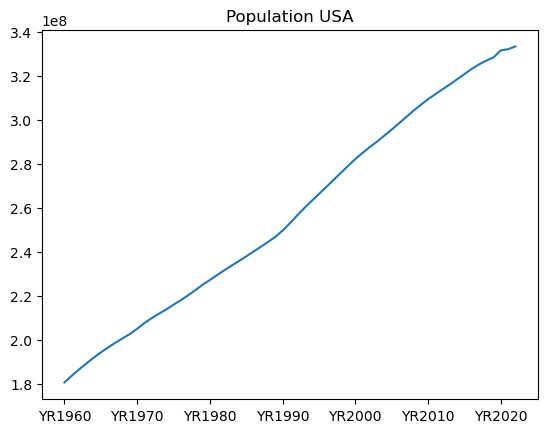

In [18]:
usa = wba.data.DataFrame('SP.POP.TOTL', 'USA').transpose()
df = pd.DataFrame(usa)
df['USA'].plot(x='USA', kind="line", title="Population USA")

<Axes: title={'center': 'GDP per capita USA'}>

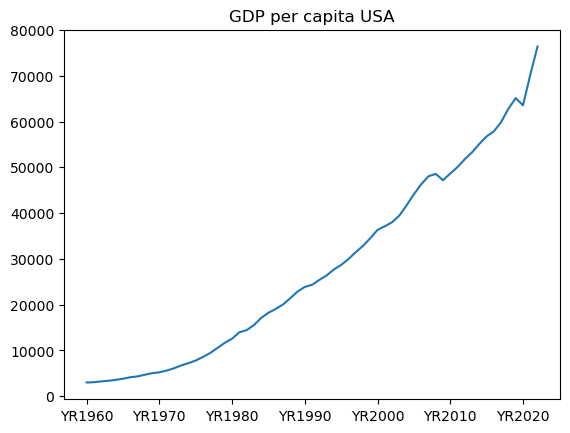

In [19]:
usa = wba.data.DataFrame('NY.GDP.PCAP.CD', 'USA').transpose()
df = pd.DataFrame(usa)
df['USA'].plot(x='USA', kind="line", title="GDP per capita USA")

<Axes: >

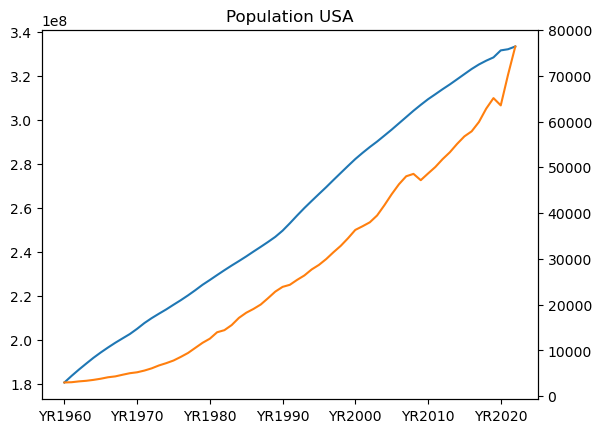

In [20]:
pop = wba.data.DataFrame('SP.POP.TOTL', 'USA').transpose()
dfp = pd.DataFrame(pop)
dfp['USA'].plot(x='USA', kind="line", title="Population USA")
gdp = wba.data.DataFrame('NY.GDP.PCAP.CD', 'USA').transpose()
dfg = pd.DataFrame(gdp)
dfg['USA'].plot(x='USA', kind="line", secondary_y=True)